# Power of **Pytorch** 1 -  Similar to Numpy
## Pytorch

In [1]:
import torch
import numpy as np

In [2]:
W_h = torch.randn(20, 20, requires_grad=True)
W_x = torch.randn(20, 10, requires_grad=True)
x = torch.randn(1,10)
prev_h = torch.randn(1, 20)

In [3]:
h2h = torch.matmul(W_h, prev_h.t())
i2h = torch.matmul(W_x, x.t())

next_h = h2h + i2h
next_h = torch.tanh(next_h)

loss = next_h.sum()
loss

tensor(2.8769, grad_fn=&lt;SumBackward0&gt;)

In [4]:
N, D = 3, 4

x = torch.randn(N, D, requires_grad=True)
y = torch.randn(N, D, requires_grad=True)
z = torch.randn(N, D, requires_grad=True)

a = x * y
b = a + z
c = torch.sum(b)

c.backward()
print(x.grad)
print(y.grad)
print(z.grad)

tensor([[ 0.8864,  0.5315,  1.2139, -0.2338],
        [-0.7460, -0.5691,  0.7210, -2.5029],
        [-1.1092, -0.8486,  1.7451,  1.6269]])
tensor([[-1.2343,  0.5202,  0.6143, -0.2477],
        [-0.2830, -0.1058, -0.3630,  0.5957],
        [-1.4092, -0.3625, -1.7572,  0.1520]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [5]:
N, D = 3, 4

x = torch.randn(N, D, requires_grad=False)
y = torch.randn(N, D, requires_grad=False)
z = torch.randn(N, D, requires_grad=False)

a = x * y
b = a + z
c = torch.sum(b)

c.backward()
print(x.grad)
print(y.grad)
print(z.grad)

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

## Change to Numpy

In [4]:
W_h_numpy = W_h.detach().numpy()
prev_h_numpy = prev_h.numpy()

## TO DO
## First, copy the above code and change what...?
h2h = np.matmul(W_h_numpy, prev_h_numpy.T)
i2h = np.matmul(W_x.detach().numpy(), x.numpy().T)

next_h = h2h + i2h
next_h = np.tanh(next_h)

loss = next_h.sum()
loss

0.3755626

# Power of **Pytorch** 2 - Comparison of frameworks
## Numpy

In [5]:
import numpy as np 
np.random.seed(0)

N, D = 3, 4

x = np.random.randn(N, D)
y = np.random.randn(N, D)
z = np.random.randn(N, D)

a = x * y
b = a + z
c = np.sum(b)

grad_c = 1.0
## TO DO : Calculate manually gradients
grad_b = grad_c * np.ones((N, D))
grad_a = grad_b.copy()
grad_z = grad_b.copy()
grad_x = grad_a * y
grad_y = grad_a * x
grad_y 

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351]])

## Tensorflow

In [6]:
import numpy as np
import tensorflow as tf

N, D = 3, 4

x = tf.placeholder(tf.float64)
y = tf.placeholder(tf.float64)
z = tf.placeholder(tf.float64)

a = x * y
b = a + z
c = tf.reduce_sum(b)

init = tf.global_variables_initializer()
## TO DO : use gradient function in Tensorflow 
grad_x, grad_y, grad_z = tf.gradients(c, [x, y, z])

with tf.Session() as sess:
    sess.run(init)
    np.random.seed(0)
    values = {
        x: np.random.randn(N, D),
        y: np.random.randn(N, D),
        z: np.random.randn(N, D),
  
  }
    # TO DO : run session
    out = sess.run([c, grad_x, grad_y, grad_z], feed_dict=values)
    c_v, grad_x_v, grad_y_v, grad_z_v = out

/home/piai/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or &#39;1type&#39; as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / &#39;(1,)type&#39;.
  _np_qint8 = np.dtype([(&quot;qint8&quot;, np.int8, 1)])
/home/piai/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or &#39;1type&#39; as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / &#39;(1,)type&#39;.
  _np_quint8 = np.dtype([(&quot;quint8&quot;, np.uint8, 1)])
/home/piai/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or &#39;1type&#39; as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / &#39;(1,)type&#39;.
  _np_qint16 = np.dtype([(&quot;qint16&quot;, np.int16, 1)])
/home/piai/.local/l

## Pytorch

In [7]:
import torch

N, D = 3, 4

x = torch.randn(N, D, requires_grad=True)
y = torch.randn(N, D, requires_grad=True)
z = torch.randn(N, D, requires_grad=True)

a = x * y
b = a + z
c = torch.sum(b)

c.backward()

# Numpy Tutorial
- Indexing 과 broadcasting 복습

## Array indexing
* Numpy array의 indexing은 일반적인 list와 유사하다. 
* 단, indexing해서 분리한 array도 원래 array의 memory를 참조하기 때문에 변경할 때 유의하여야 한다.

In [8]:
import numpy as np

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a, '\n')

# [[2 3]
#  [6 7]]
# call-by-reference가 된 경우
b = a[:2, 1:3]
print(b)

print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

[[2 3]
 [6 7]]
2
77


####  Slicing을 할 때는 dimension이 낮아질 수 있다.
- Slicing을 하는 방법에는 여러가지가 있는데, integer를 활용해 indexing을 할 때는 dimension이 낮아지고, slicing을 이용해 indexing 할 때는 dimension이 유지된다.

In [9]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a, a.shape)

row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
# row_r1 = np.expand_dims(row_r1, axis=0)
print("Slicing Row")
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)


col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print("Slicing Column")
print(col_r1, col_r1.shape, '\n')
print(col_r2, col_r2.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] (3, 4)
Slicing Row
[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)
Slicing Column
[ 2  6 10] (3,) 

[[ 2]
 [ 6]
 [10]] (3, 1)


#### Integer array를 이용해 indexing을 할 수 있다. 
- Slicing을 할 때는 네모난 subarray만 추출할 수 있지만, integer array를 이용할 경우 임의의 수치들을 꺼내올 수 있다.

In [10]:
a = np.array([[1,2], [3, 4], [5, 6]])

print(np.array([a[0, 0], a[1, 1], a[2, 0]]))
print(a[[0, 1, 2], [0, 1, 0]])

[1 4 5]
[1 4 5]


In [11]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

## TO DO 
# Select one element from each row of a using the indices
b = np.array([0, 2, 0, 1])
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

a[np.arange(4), b] += 10
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array로도 indexing을 할 수 있다. 

In [12]:
print(a > 2)
print(a[a > 2])

[[ True False  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[11  3  4  5 16 17  8  9 10 21 12]


## Broadcasting
- Broadcasting is strong!

In [13]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   

for i in range(4):
    y[i, :] = x[i, :] + v
print(y)

vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
y = x + vv  
print(y)

y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [14]:
##Quiz
def checkbroadcasting(x, y):
    try:
        x+y
        print("correct")
    except:
        print("wrong")

x=np.empty((0))
y=np.empty((2,2))
checkbroadcasting(x,y)
        
x=np.empty((5,3,4,1))
y=np.empty((3,4,1))
checkbroadcasting(x,y)

x=np.empty((5,3,4,1))
y=np.empty((3,1,1))
checkbroadcasting(x,y)

x=np.empty((5,2,4,1))
y=np.empty((3,1,1))
checkbroadcasting(x,y)

wrong
correct
correct
wrong


## 지금까지 배운 indexing 과 Broadcasting 방법이 ***모두*** Pytorch에도 적용 된다.

# Pytorch Tutorial

## Tensors
* Tensorflow의 Tensor와 다르지 않다.
  * Numpy의 ndarrays를 기본적으로 활용하고 있다.
  * Numpy의 ndarrays의 대부분의 operation을 사용할 수 있도록 구성되어 있다.
* Numpy의 operation은 CPU만을 이용해 느리지만 Tensor는 CUDA를 활용해 GPU를 이용하기 때문에 빠르게 연산을 진행할 수 있다.


In [15]:
%matplotlib inline
import torch

In [16]:
# Construct a 5 x 3 matrix, uninitialized
x = torch.Tensor(5, 3)
print(x, '\n')

# Construct a randomly initialized matrix 
x = torch.rand(5, 3)
print(x, '\n')

# Construct a matrix with the list
x = torch.tensor([[3, 4, 5], [1, 2, 3]])
print(x, '\n')

# Get its size
print(x.size())
print(x.shape) #???? is it Numpy? kkkkk

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.2780e-42, 0.0000e+00],
        [1.1210e-43, 0.0000e+00, 8.7673e-35],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [7.8473e-44, 2.8026e-45, 2.8026e-45]]) 

tensor([[0.2950, 0.5948, 0.1377],
        [0.4909, 0.1862, 0.0055],
        [0.2166, 0.2649, 0.0877],
        [0.0480, 0.4886, 0.9765],
        [0.4372, 0.1419, 0.2328]]) 

tensor([[3, 4, 5],
        [1, 2, 3]]) 

torch.Size([2, 3])
torch.Size([2, 3])


### dtype and device 
 * dtype - Tensor의 데이터 타입
 * device - Tensor의 작업 위치 (cpu or cuda)

In [17]:
x = torch.tensor([[3, 4, 5], [1, 2, 3]], dtype=torch.float64)
print(x, '\n')

y = torch.tensor([[3, 4, 5], [1, 2, 3]])
print(y, '\n')

#error
print(x + y)

tensor([[3., 4., 5.],
        [1., 2., 3.]], dtype=torch.float64) 

tensor([[3, 4, 5],
        [1, 2, 3]]) 

tensor([[ 6.,  8., 10.],
        [ 2.,  4.,  6.]], dtype=torch.float64)


In [18]:
y = y.double() 
print(y, '\n')

print(x + y)

tensor([[3., 4., 5.],
        [1., 2., 3.]], dtype=torch.float64) 

tensor([[ 6.,  8., 10.],
        [ 2.,  4.,  6.]], dtype=torch.float64)


In [19]:
device = torch.device('cuda')
device = torch.device('cuda:1')
x = x.to(device)

print(x, '\n')
print(x.device, '\n')

tensor([[3., 4., 5.],
        [1., 2., 3.]], device=&#39;cuda:1&#39;, dtype=torch.float64) 

cuda:1 



In [20]:
device_0 = torch.device('cuda:0')
device_1 = torch.device('cuda:1')

x = torch.randn(4, 3, dtype=torch.float64)
y = torch.randn(4, 3, dtype=torch.float32)
z = torch.randint(0, 10, (4, 3), dtype=torch.int32)

z = z.to(device_1)

print('Before "to" method')

print(x.dtype, x.device)
print(y.dtype, y.device)
print(z.dtype, z.device, '\n')

print('After "to" method')
# to method with specific dtype and device 
x = x.to(dtype=torch.int32, device=device_0)

# to method with some tensor 
y = y.to(z)
z = z.to(device="cpu")

print(x.dtype, x.device)
print(y.dtype, y.device)
print(z.dtype, z.device, '\n')

Before &quot;to&quot; method
torch.float64 cpu
torch.float32 cpu
torch.int32 cuda:1 

After &quot;to&quot; method
torch.int32 cuda:0
torch.int32 cuda:1
torch.int32 cpu 



### Constructing like Numpy

In [21]:
x = torch.empty(3, 5)
print(x, '\n')

x = torch.zeros(3, 5)
print(x, '\n')

x = torch.ones(3, 5)
print(x, '\n')

x = torch.full((3, 5), 3.1415)
print(x, '\n')

x = torch.arange(0, 5, 2)
print(x, '\n')

y = torch.linspace(0, 5, 9)
print(y, '\n')

z = torch.logspace(-10, 10, 5)
print(z, '\n')

z = torch.eye(5)
print(z, '\n')

# Construct a 3 x 5 matrix with random value from uniform distribution, i.e. Uniform[0, 1)
x = torch.rand(3, 5)

# Construct a 3 x 5 matrix with random value from normal distribution, i.e. Normal(0, 1)
x = torch.randn(3, 5)

x = torch.randint(3, 10, (3, 5))
print(x, '\n')


tensor([[ 4.8654e+04,  4.5722e-41, -6.2216e-26,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 2.6302e+20,  6.1949e-04,  1.0256e-08,  6.4456e-10,  3.1128e+12]]) 

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]) 

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]) 

tensor([[3.1415, 3.1415, 3.1415, 3.1415, 3.1415],
        [3.1415, 3.1415, 3.1415, 3.1415, 3.1415],
        [3.1415, 3.1415, 3.1415, 3.1415, 3.1415]]) 

tensor([0, 2, 4]) 

tensor([0.0000, 0.6250, 1.2500, 1.8750, 2.5000, 3.1250, 3.7500, 4.3750, 5.0000]) 

tensor([1.0000e-10, 1.0000e-05, 1.0000e+00, 1.0000e+05, 1.0000e+10]) 

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]) 

tensor([[3, 7, 6, 4, 7],
        [3, 6, 9, 5, 3],
        [3, 3, 4, 7, 5]]) 



### \*\_like function and new\_\* function
 * \*\_like: Tensor를 input으로 받아, Tensor 모양의 matrix를 return.
 * new\_\*: Shape를 input으로 받아, Tensor와 같은 type과 device를 가지는 matrix를 return

In [22]:
y = torch.zeros_like(x)
print(y, '\n')

# Make zero matrix with attribute of x
z = x.new_zeros(2, 3)
print(z, '\n')
print(x.dtype, x.device)
print(z.dtype, z.device,'\n')

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]) 

tensor([[0, 0, 0],
        [0, 0, 0]]) 

torch.int64 cpu
torch.int64 cpu 



In [23]:
a = np.ones(5)
b = torch.from_numpy(a)
c = b.numpy()
print("\n",a,"\n",b,"\n",c)


 [1. 1. 1. 1. 1.] 
 tensor([1., 1., 1., 1., 1.], dtype=torch.float64) 
 [1. 1. 1. 1. 1.]


### Operations
* Operations에도 여러가지 syntax가 있다.

In [24]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y, '\n')

print(torch.add(x, y), '\n')

result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result, '\n')

y.add_(x)
print(y, '\n')

# indexing 또한 비슷하게
print(x[:, 1], '\n')
print(x[x > 0.5])

tensor([[0.2840, 1.7311, 1.4480],
        [1.1503, 0.3623, 1.0301],
        [0.5567, 1.3016, 0.8032],
        [1.0576, 1.6082, 0.5499],
        [1.7389, 0.9164, 0.7721]]) 

tensor([[0.2840, 1.7311, 1.4480],
        [1.1503, 0.3623, 1.0301],
        [0.5567, 1.3016, 0.8032],
        [1.0576, 1.6082, 0.5499],
        [1.7389, 0.9164, 0.7721]]) 

tensor([[0.2840, 1.7311, 1.4480],
        [1.1503, 0.3623, 1.0301],
        [0.5567, 1.3016, 0.8032],
        [1.0576, 1.6082, 0.5499],
        [1.7389, 0.9164, 0.7721]]) 

tensor([[0.2840, 1.7311, 1.4480],
        [1.1503, 0.3623, 1.0301],
        [0.5567, 1.3016, 0.8032],
        [1.0576, 1.6082, 0.5499],
        [1.7389, 0.9164, 0.7721]]) 

tensor([0.8973, 0.3448, 0.6788, 0.9900, 0.5614]) 

tensor([0.8973, 0.5295, 0.6788, 0.9272, 0.9900, 0.9021, 0.5614])


### reshape -> view

In [25]:
# Change the shape of tensor 
x = torch.arange(0, 10)
print(x, '\n')

y = x.view(2, 5)
print(y, '\n')

x = torch.arange(0, 30).view(5, 6)
print(x, '\n')
print(x.size(), '\n')

y = x.view(-1, 2, 5)
print(y, '\n')
print(y.size(), '\n')

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]) 

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29]]) 

torch.Size([5, 6]) 

tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9]],

        [[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]]]) 

torch.Size([3, 2, 5]) 



### expand_dim -> unsqueeze

In [26]:
# Change the dimension of tensor
x = torch.arange(0, 10).view(2, 5)
print(x, '\n')

# view를 사용하기 까다로울때 사용
y = x.permute(1, 0)
print(y, y.shape, '\n')

# Add the dimension of tensor 
z = x.unsqueeze(0)
print(z.size(), '\n')

z = x.unsqueeze(1)
print(z.size(), '\n')

# size=1 인 dimension 제거
z = z.squeeze()
print(z.size(), '\n')


tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]) 

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]]) torch.Size([5, 2]) 

torch.Size([1, 2, 5]) 

torch.Size([2, 1, 5]) 

torch.Size([2, 5]) 



### multiplication and concatenation

In [27]:
x = torch.ones( 5, 3)+1
y = torch.ones( 5, 3)+2
z = x * y
print(x.shape, y.shape)
print(z, z.shape)

z= torch.matmul(x, y.t())
print(z, z.shape)

x = x.unsqueeze(0)
y = y.unsqueeze(0)
z = torch.cat([x, y], dim=0)
print(z.shape)

torch.Size([5, 3]) torch.Size([5, 3])
tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]]) torch.Size([5, 3])
tensor([[18., 18., 18., 18., 18.],
        [18., 18., 18., 18., 18.],
        [18., 18., 18., 18., 18.],
        [18., 18., 18., 18., 18.],
        [18., 18., 18., 18., 18.]]) torch.Size([5, 5])
torch.Size([2, 5, 3])


### tile -> expand

In [28]:
x = torch.randn(100, 700)
x = x.unsqueeze(2).expand(100, 700, 28)
print(x.shape)

x = torch.randn(100, 700)
x = x.unsqueeze(1).expand(100, 28, 700)
print(x.shape)

torch.Size([100, 700, 28])
torch.Size([100, 28, 700])


# \***********Numpy Practice Time\***********


In [29]:
src = torch.ones(4,5,4,4)
ch_insert= torch.ones(4,2,4,4)*7

In [30]:
src_uns2 = src.unsqueeze(2)
ch_insert_uns1 = ch_insert.unsqueeze(1)
expand_dim = list(src_uns2.shape)
expand_dim[2] = ch_insert_uns1.shape[2]
ch_insert_uns1 = ch_insert_uns1.expand(tuple(expand_dim))
cated_tensor = torch.cat([ch_insert_uns1, src_uns2], dim=2)
result = cated_tensor.view(expand_dim[0],expand_dim[1]*(expand_dim[2]+1),expand_dim[3],expand_dim[4])
result

tensor([[[[7., 7., 7., 7.],
          [7., 7., 7., 7.],
          [7., 7., 7., 7.],
          [7., 7., 7., 7.]],

         [[7., 7., 7., 7.],
          [7., 7., 7., 7.],
          [7., 7., 7., 7.],
          [7., 7., 7., 7.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[7., 7., 7., 7.],
          [7., 7., 7., 7.],
          [7., 7., 7., 7.],
          [7., 7., 7., 7.]],

         [[7., 7., 7., 7.],
          [7., 7., 7., 7.],
          [7., 7., 7., 7.],
          [7., 7., 7., 7.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[7., 7., 7., 7.],
          [7., 7., 7., 7.],
          [7., 7., 7., 7.],
          [7., 7., 7., 7.]],

         [[7., 7., 7., 7.],
          [7., 7., 7., 7.],
          [7., 7., 7., 7.],
          [7., 7., 7., 7.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
    

## Autograd: automatic differentiation
* Autograd package는 Tensors가 사용할 수 있는 모든 Operation의 Gradient를 자동으로 계산해준다.
* Tensor의 required_grad attribute를 이용해 gradient의 계산여부를 결정할 수 있다.
  * 계산이 완료된 이후에 .backward()를 호출하면 자동으로 gradient를 계산한다.
  * .grad attribute를 통해 마찬가지로 gradient에 접근할 수 있다. 
  * .grad_fn attribute를 통해 해당 Variable이 어떻게 생성되었는지 확인할 수 있다.
  
  
![Alt text](./resource/Variable.png "Variable")

In [31]:
# Create a variable
x = torch.ones(2, 2, requires_grad=True)

print(x)
print(x.requires_grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [32]:
y = x + 2
print(y)

# y는 operation으로 생성된 결과이기 때문에 grad_fn이 있지만 , x는 없다.
print(x.grad_fn)
print(y.grad_fn)

# Do more operations on y 
z = y * y * 3
out = z.mean()

print(z, z.grad_fn, '\n')
print(out)

tensor([[3., 3.],
        [3., 3.]], grad_fn=&lt;AddBackward0&gt;)
None
&lt;AddBackward0 object at 0x7f73be78e6a0&gt;
tensor([[27., 27.],
        [27., 27.]], grad_fn=&lt;MulBackward0&gt;) &lt;MulBackward0 object at 0x7f73540965c0&gt; 

tensor(27., grad_fn=&lt;MeanBackward0&gt;)


### Gradients 
* out.backward()을 하면 out의 gradient를 1로 시작해 Back-propagation을 시작한다.
* .backward()를 호출한 이후부터는 .grad를 통해 각 변수의 gradient를 구할 수 있다.

In [33]:
# out.backward() == out.backward(tr.Tensor([1.0]))
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


* 실제로 Gradient 를 계산하면 다음과 같다.
$$o = \frac{1}{4}\sum_{i} z_{i}$$ 

$$z_{i}=3(x_{i}+2)^{2}$$

$$z_{i}|_{x_{i}=1} = 27 $$

$$ \frac{\partial o}{\partial x_{i}} = \frac{3}{2}(x_{i} + 2) $$

$$ \frac{\partial o}{\partial x_{i}}|_{x_{i}=1} = 4.5$$

In [34]:
# We can do many crazy thing with autograd
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

# y = 1024 * x
print(y)

gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float32)
y.backward(gradients)
# 1024
print(x.grad)

tensor([ 534.7814, -698.1065, -950.7838], grad_fn=&lt;MulBackward0&gt;)
tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


# Neural Network
## 1. Define the network
* nn.Module 을 inherit하는 class를 define한다.
  * __init__(self): 생성자, network에서 사용할 구조를 정의한다.
  * forward(self, x): x를 input으로 받는 network가 어떻게 작동해 어떤 output을 내놓을지 정의한다.
  * backward(self, grad_output): grad_output을 받아 직전 layer로 gradient를 backpropagation해주는 함수. 기본적으로는 autograd를 통해 자동으로 정의된다.
  
  ![convnet](./resource/mnist.png "Variable")

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [8]:
# 일반적으로 네트워크의 파라미터가 많으면 많을수록 성능이 좋다. 하지만 상황에 따라 다르다
# 예를 들어 모바일의 경우 파라미터가 적은것이 오히려 유리하다.

In [9]:
# The learnable parameters of a model are returned by net.parameters()
params = list(net.parameters())
print(len(params))
print(params[0].size())
print(sum(p.numel() for p in params))# 파라미터 수를 계산하는 코드

# The input to the forward is a tensor, and so is the output
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

10
torch.Size([6, 1, 5, 5])
61706
tensor([[-0.0319,  0.0164,  0.0172, -0.0917, -0.1121,  0.0737,  0.0797, -0.0112,
          0.1140, -0.0198]], grad_fn=&lt;AddmmBackward&gt;)


### Loss Function
* Loss function은 (output, target) 을 input으로 받아 그 차이를 return한다.
* 직접 구현할 수도 있지만 대부분의 일반적인 loss는 대부분 nn package에 구현되어있다.

In [10]:
# For example
output = net(input)
target = torch.arange(1, 11).unsqueeze(0)  # a dummy target, for example
criterion = nn.MSELoss()# Loss정의는 대부분의 경우 그냥 가져오면 된다.

# 만약 커스텀 로스를 구현하려면? L1 Loss
# Torch.abs(output - target)

loss = criterion(output, target)
print(loss)
# You can follow loss in the backward direction, using it's .grad_fn attribute
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[1][0])  # ReLU

tensor(38.3322, grad_fn=&lt;MseLossBackward&gt;)
&lt;MseLossBackward object at 0x7fdd0ab55f98&gt;
&lt;AddmmBackward object at 0x7fdd0ab55ef0&gt;
&lt;ReluBackward0 object at 0x7fdd0ab55e10&gt;


### Backprop
* Back-propagation을 위해서는 여러번 언급했듯이 loss.backward()를 이용한다.
* net.zero_grad()를 이용해 먼저 모든 parameter의 gradient buffer에 0을 대입한다.

In [11]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

# print('conv1.bias.grad before backward')
# print(net.conv1.bias.grad)

loss.backward()

# print('conv1.bias.grad after backward')
# print(net.conv1.bias.grad)

RuntimeError: Found dtype Long but expected Float
Exception raised from compute_types at /pytorch/aten/src/ATen/native/TensorIterator.cpp:183 (most recent call first):
frame #0: c10::Error::Error(c10::SourceLocation, std::string) + 0x42 (0x7fdd7858c1e2 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libc10.so)
frame #1: at::TensorIterator::compute_types(at::TensorIteratorConfig const&amp;) + 0x259 (0x7fdd5ccc1849 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #2: at::TensorIterator::build(at::TensorIteratorConfig&amp;) + 0x6b (0x7fdd5ccc4feb in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #3: at::TensorIterator::TensorIterator(at::TensorIteratorConfig&amp;) + 0xdd (0x7fdd5ccc565d in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #4: at::native::mse_loss_backward_out(at::Tensor&amp;, at::Tensor const&amp;, at::Tensor const&amp;, at::Tensor const&amp;, long) + 0x18a (0x7fdd5cb2a2ba in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #5: at::native::mse_loss_backward(at::Tensor const&amp;, at::Tensor const&amp;, at::Tensor const&amp;, long) + 0x90 (0x7fdd5cb26ce0 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #6: &lt;unknown function&gt; + 0x10fa2f9 (0x7fdd5cf392f9 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #7: &lt;unknown function&gt; + 0xa9ac76 (0x7fdd5c8d9c76 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #8: at::mse_loss_backward(at::Tensor const&amp;, at::Tensor const&amp;, at::Tensor const&amp;, long) + 0x119 (0x7fdd5cfe9949 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #9: &lt;unknown function&gt; + 0x2e03469 (0x7fdd5ec42469 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #10: &lt;unknown function&gt; + 0xa9ac76 (0x7fdd5c8d9c76 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #11: at::mse_loss_backward(at::Tensor const&amp;, at::Tensor const&amp;, at::Tensor const&amp;, long) + 0x119 (0x7fdd5cfe9949 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #12: torch::autograd::generated::MseLossBackward::apply(std::vector&lt;at::Tensor, std::allocator&lt;at::Tensor&gt; &gt;&amp;&amp;) + 0x1af (0x7fdd5eb7e0cf in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #13: &lt;unknown function&gt; + 0x3375bb7 (0x7fdd5f1b4bb7 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #14: torch::autograd::Engine::evaluate_function(std::shared_ptr&lt;torch::autograd::GraphTask&gt;&amp;, torch::autograd::Node*, torch::autograd::InputBuffer&amp;, std::shared_ptr&lt;torch::autograd::ReadyQueue&gt; const&amp;) + 0x1400 (0x7fdd5f1b0400 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #15: torch::autograd::Engine::thread_main(std::shared_ptr&lt;torch::autograd::GraphTask&gt; const&amp;) + 0x451 (0x7fdd5f1b0fa1 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #16: torch::autograd::Engine::execute_with_graph_task(std::shared_ptr&lt;torch::autograd::GraphTask&gt; const&amp;, std::shared_ptr&lt;torch::autograd::Node&gt;) + 0x37c (0x7fdd5f1ae6bc in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #17: torch::autograd::python::PythonEngine::execute_with_graph_task(std::shared_ptr&lt;torch::autograd::GraphTask&gt; const&amp;, std::shared_ptr&lt;torch::autograd::Node&gt;) + 0x3c (0x7fdd7933e8dc in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_python.so)
frame #18: torch::autograd::Engine::execute(std::vector&lt;torch::autograd::Edge, std::allocator&lt;torch::autograd::Edge&gt; &gt; const&amp;, std::vector&lt;at::Tensor, std::allocator&lt;at::Tensor&gt; &gt; const&amp;, bool, bool, std::vector&lt;torch::autograd::Edge, std::allocator&lt;torch::autograd::Edge&gt; &gt; const&amp;) + 0x803 (0x7fdd5f1ad9f3 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #19: torch::autograd::python::PythonEngine::execute(std::vector&lt;torch::autograd::Edge, std::allocator&lt;torch::autograd::Edge&gt; &gt; const&amp;, std::vector&lt;at::Tensor, std::allocator&lt;at::Tensor&gt; &gt; const&amp;, bool, bool, std::vector&lt;torch::autograd::Edge, std::allocator&lt;torch::autograd::Edge&gt; &gt; const&amp;) + 0x4e (0x7fdd7933e6de in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_python.so)
frame #20: THPEngine_run_backward(THPEngine*, _object*, _object*) + 0xa54 (0x7fdd7933f3c4 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_python.so)
frame #21: /usr/bin/python3() [0x50a7f5]
frame #22: _PyEval_EvalFrameDefault + 0x1226 (0x50cfd6 in /usr/bin/python3)
frame #23: /usr/bin/python3() [0x507f24]
frame #24: /usr/bin/python3() [0x509c50]
frame #25: /usr/bin/python3() [0x50a64d]
frame #26: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #27: /usr/bin/python3() [0x507f24]
frame #28: /usr/bin/python3() [0x509c50]
frame #29: /usr/bin/python3() [0x50a64d]
frame #30: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #31: /usr/bin/python3() [0x507f24]
frame #32: /usr/bin/python3() [0x5165a5]
frame #33: /usr/bin/python3() [0x50a47f]
frame #34: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #35: /usr/bin/python3() [0x58e3ea]
frame #36: _PyEval_EvalFrameDefault + 0x19dc (0x50d78c in /usr/bin/python3)
frame #37: /usr/bin/python3() [0x58e3ea]
frame #38: _PyEval_EvalFrameDefault + 0x19dc (0x50d78c in /usr/bin/python3)
frame #39: /usr/bin/python3() [0x58e3ea]
frame #40: /usr/bin/python3() [0x50a51c]
frame #41: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #42: /usr/bin/python3() [0x509918]
frame #43: /usr/bin/python3() [0x50a64d]
frame #44: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #45: /usr/bin/python3() [0x509918]
frame #46: /usr/bin/python3() [0x50a64d]
frame #47: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #48: /usr/bin/python3() [0x507f24]
frame #49: _PyFunction_FastCallDict + 0x2e2 (0x509202 in /usr/bin/python3)
frame #50: /usr/bin/python3() [0x594b01]
frame #51: PyObject_Call + 0x3e (0x59fe1e in /usr/bin/python3)
frame #52: _PyEval_EvalFrameDefault + 0x17e6 (0x50d596 in /usr/bin/python3)
frame #53: /usr/bin/python3() [0x507f24]
frame #54: /usr/bin/python3() [0x509c50]
frame #55: /usr/bin/python3() [0x50a64d]
frame #56: _PyEval_EvalFrameDefault + 0x1226 (0x50cfd6 in /usr/bin/python3)
frame #57: /usr/bin/python3() [0x58e809]
frame #58: /usr/bin/python3() [0x513def]
frame #59: /usr/bin/python3() [0x50a47f]
frame #60: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #61: /usr/bin/python3() [0x507f24]
frame #62: /usr/bin/python3() [0x509c50]
frame #63: /usr/bin/python3() [0x50a64d]


### Update the weights

In [6]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

NameError: name &#39;net&#39; is not defined

In [12]:
import torch.optim as optim
import time 

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers

output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update


RuntimeError: Found dtype Long but expected Float
Exception raised from compute_types at /pytorch/aten/src/ATen/native/TensorIterator.cpp:183 (most recent call first):
frame #0: c10::Error::Error(c10::SourceLocation, std::string) + 0x42 (0x7fdd7858c1e2 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libc10.so)
frame #1: at::TensorIterator::compute_types(at::TensorIteratorConfig const&amp;) + 0x259 (0x7fdd5ccc1849 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #2: at::TensorIterator::build(at::TensorIteratorConfig&amp;) + 0x6b (0x7fdd5ccc4feb in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #3: at::TensorIterator::TensorIterator(at::TensorIteratorConfig&amp;) + 0xdd (0x7fdd5ccc565d in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #4: at::native::mse_loss_backward_out(at::Tensor&amp;, at::Tensor const&amp;, at::Tensor const&amp;, at::Tensor const&amp;, long) + 0x18a (0x7fdd5cb2a2ba in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #5: at::native::mse_loss_backward(at::Tensor const&amp;, at::Tensor const&amp;, at::Tensor const&amp;, long) + 0x90 (0x7fdd5cb26ce0 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #6: &lt;unknown function&gt; + 0x10fa2f9 (0x7fdd5cf392f9 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #7: &lt;unknown function&gt; + 0xa9ac76 (0x7fdd5c8d9c76 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #8: at::mse_loss_backward(at::Tensor const&amp;, at::Tensor const&amp;, at::Tensor const&amp;, long) + 0x119 (0x7fdd5cfe9949 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #9: &lt;unknown function&gt; + 0x2e03469 (0x7fdd5ec42469 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #10: &lt;unknown function&gt; + 0xa9ac76 (0x7fdd5c8d9c76 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #11: at::mse_loss_backward(at::Tensor const&amp;, at::Tensor const&amp;, at::Tensor const&amp;, long) + 0x119 (0x7fdd5cfe9949 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #12: torch::autograd::generated::MseLossBackward::apply(std::vector&lt;at::Tensor, std::allocator&lt;at::Tensor&gt; &gt;&amp;&amp;) + 0x1af (0x7fdd5eb7e0cf in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #13: &lt;unknown function&gt; + 0x3375bb7 (0x7fdd5f1b4bb7 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #14: torch::autograd::Engine::evaluate_function(std::shared_ptr&lt;torch::autograd::GraphTask&gt;&amp;, torch::autograd::Node*, torch::autograd::InputBuffer&amp;, std::shared_ptr&lt;torch::autograd::ReadyQueue&gt; const&amp;) + 0x1400 (0x7fdd5f1b0400 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #15: torch::autograd::Engine::thread_main(std::shared_ptr&lt;torch::autograd::GraphTask&gt; const&amp;) + 0x451 (0x7fdd5f1b0fa1 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #16: torch::autograd::Engine::execute_with_graph_task(std::shared_ptr&lt;torch::autograd::GraphTask&gt; const&amp;, std::shared_ptr&lt;torch::autograd::Node&gt;) + 0x37c (0x7fdd5f1ae6bc in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #17: torch::autograd::python::PythonEngine::execute_with_graph_task(std::shared_ptr&lt;torch::autograd::GraphTask&gt; const&amp;, std::shared_ptr&lt;torch::autograd::Node&gt;) + 0x3c (0x7fdd7933e8dc in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_python.so)
frame #18: torch::autograd::Engine::execute(std::vector&lt;torch::autograd::Edge, std::allocator&lt;torch::autograd::Edge&gt; &gt; const&amp;, std::vector&lt;at::Tensor, std::allocator&lt;at::Tensor&gt; &gt; const&amp;, bool, bool, std::vector&lt;torch::autograd::Edge, std::allocator&lt;torch::autograd::Edge&gt; &gt; const&amp;) + 0x803 (0x7fdd5f1ad9f3 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_cpu.so)
frame #19: torch::autograd::python::PythonEngine::execute(std::vector&lt;torch::autograd::Edge, std::allocator&lt;torch::autograd::Edge&gt; &gt; const&amp;, std::vector&lt;at::Tensor, std::allocator&lt;at::Tensor&gt; &gt; const&amp;, bool, bool, std::vector&lt;torch::autograd::Edge, std::allocator&lt;torch::autograd::Edge&gt; &gt; const&amp;) + 0x4e (0x7fdd7933e6de in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_python.so)
frame #20: THPEngine_run_backward(THPEngine*, _object*, _object*) + 0xa54 (0x7fdd7933f3c4 in /home/piai/.local/lib/python3.6/site-packages/torch/lib/libtorch_python.so)
frame #21: /usr/bin/python3() [0x50a7f5]
frame #22: _PyEval_EvalFrameDefault + 0x1226 (0x50cfd6 in /usr/bin/python3)
frame #23: /usr/bin/python3() [0x507f24]
frame #24: /usr/bin/python3() [0x509c50]
frame #25: /usr/bin/python3() [0x50a64d]
frame #26: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #27: /usr/bin/python3() [0x507f24]
frame #28: /usr/bin/python3() [0x509c50]
frame #29: /usr/bin/python3() [0x50a64d]
frame #30: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #31: /usr/bin/python3() [0x507f24]
frame #32: /usr/bin/python3() [0x5165a5]
frame #33: /usr/bin/python3() [0x50a47f]
frame #34: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #35: /usr/bin/python3() [0x58e3ea]
frame #36: _PyEval_EvalFrameDefault + 0x19dc (0x50d78c in /usr/bin/python3)
frame #37: /usr/bin/python3() [0x58e3ea]
frame #38: _PyEval_EvalFrameDefault + 0x19dc (0x50d78c in /usr/bin/python3)
frame #39: /usr/bin/python3() [0x58e3ea]
frame #40: /usr/bin/python3() [0x50a51c]
frame #41: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #42: /usr/bin/python3() [0x509918]
frame #43: /usr/bin/python3() [0x50a64d]
frame #44: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #45: /usr/bin/python3() [0x509918]
frame #46: /usr/bin/python3() [0x50a64d]
frame #47: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #48: /usr/bin/python3() [0x507f24]
frame #49: _PyFunction_FastCallDict + 0x2e2 (0x509202 in /usr/bin/python3)
frame #50: /usr/bin/python3() [0x594b01]
frame #51: PyObject_Call + 0x3e (0x59fe1e in /usr/bin/python3)
frame #52: _PyEval_EvalFrameDefault + 0x17e6 (0x50d596 in /usr/bin/python3)
frame #53: /usr/bin/python3() [0x507f24]
frame #54: /usr/bin/python3() [0x509c50]
frame #55: /usr/bin/python3() [0x50a64d]
frame #56: _PyEval_EvalFrameDefault + 0x1226 (0x50cfd6 in /usr/bin/python3)
frame #57: /usr/bin/python3() [0x58e809]
frame #58: /usr/bin/python3() [0x513def]
frame #59: /usr/bin/python3() [0x50a47f]
frame #60: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #61: /usr/bin/python3() [0x507f24]
frame #62: /usr/bin/python3() [0x509c50]
frame #63: /usr/bin/python3() [0x50a64d]


### Network with CUDA

In [35]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
print(device)

net.to(device)
input = torch.randn(1, 1, 32, 32, device=device)

out = net(input)

print(out, out.device)

cuda:0
tensor([[ 0.0141,  0.1376,  0.0434,  0.1120, -0.0666,  0.0737,  0.0570,
          0.0077,  0.1031,  0.1704]], device='cuda:0') cuda:0


## Datasets and DataLoader
* Tensorflow와 가장 크게 다른 점. 
* Tensorflow에서는 dataset과 loader의 form이 구체적이지 않았으나, PyTorch에서는 dataset과 DataLoader의 구체적인 form을 제공하고 쉽게 Batch를 만들 수 있도록 한다.
  * torch.utils.data.Dataset: Neural Network에 사용하고자 하는 dataset에서 이미지를 뽑아주는 역할을 하는 class. 여기서 image의  pre-processing을 할 수 있다.
  * torch.utils.data.DataLoader: Dataset을 통해 전처리된 이미지를 batch_size 개수만큼 뽑아 batch를 만들어주는 역할을 하는 class. 이미지의 순서를 섞는 등의 효과를 사용할 수도 있다.
  * 직접 구현하는 것도 가능하지만 다음 시간에 활용하고자 한다.
* 유명한 dataset의 경우 pytorch (torchvision.datasets)에서 기본적으로 제공한다. 
  * MNIST 
  * COCO (Captions, Detection)
  * LSUN
  * ImageFolder
  * Imagenet-12
  * CIFAR
  * STL10
  * SVHN
  * PhotoTour
  
### Transform
* Data augmentation을 위한 변환을 자동으로 수행해주는 함수
* torchvision.transforms에 위치하고 있음
  * 역시 직접 구현도 가능하다. 이도 역시 다음 시간에 활용한다. 

In [36]:
import torchvision
import torchvision.transforms as transforms

In [50]:
# Transform
# Data를 읽으면 numpy → tensor == transform.ToTensor()
# Data값 범위 0~255 → -1 ~ 1 == transform.Normalize()
# 노말라이즈 값은 데이터의 평균과 편차를 넣어주는것이 가장 좋다.


In [37]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                         shuffle=True, num_workers=2)

In [38]:
import matplotlib.pyplot as plt

    4     0     2     2     6     4     3     4


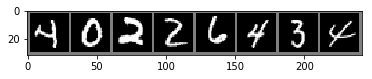

In [39]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j].item() for j in range(8)))